In [1]:
%matplotlib nbagg

In [2]:
import numpy
import pyFAI
from pyFAI.detectors import Detector
from pyFAI.azimuthalIntegrator import AzimuthalIntegrator
from pyFAI.ext import splitPixel

In [3]:
det = Detector(1e-3, 1e-3, max_shape=(5,5))

In [4]:
det

Detector Detector	 Spline= None	 PixelSize= 1.000e-03, 1.000e-03 m

In [5]:
def area4(a0, a1, b0, b1,c0,c1,d0,d1):
    """
    Calculate the area of the ABCD polygon with 4 with corners:
    A(a0,a1)
    B(b0,b1)
    C(c0,c1)
    D(d0,d1)
    :return: area, i.e. 1/2 * (AC ^ BD)
    """
    return 0.5 * (((c0 - a0) * (d1 - b1)) - ((c1 - a1) * (d0 - b0)))

In [6]:
ai = AzimuthalIntegrator(1, 2.2e-3, 2.8e-3, rot3=-0.4, detector=det)
ai.setChiDiscAtPi()

pos = ai.array_from_unit(typ="corner", unit="r_mm", scale=True)

a = []
s = 0
ss = 0
cnt = 0
for i0 in range(pos.shape[0]):
    for i1 in range(pos.shape[1]):
        p = pos[i0, i1].copy()
        area = area4(*p.ravel())
        area2 = None
        if area>=0:
            az = p[:, 1]
            print(p)
            m = numpy.where(az<0)
            az[m] = 2*numpy.pi + az[m]
            p[:, 1 ] = az
#             print(p[:, 1])
            area2 = area4(*p.ravel())
        print(i0, i1, area, area2)
        

0 0 -0.34348252415657043 None
0 1 -0.45259377360343933 None
0 2 -0.5785899758338928 None
0 3 -0.5334692001342773 None
0 4 -0.4045378267765045 None
1 0 -0.413833886384964 None
1 1 -0.6470320224761963 None
1 2 -1.1334359645843506 None
1 3 -0.8771651983261108 None
1 4 -0.5334692001342773 None
[[ 2.807134  -2.6702852]
 [ 2.912044  -3.0198922]
 [ 1.9697715  3.1233683]
 [ 1.811077  -2.6309354]]
2 0 3.0264618396759033 -0.4323281943798065
[[ 1.811077   -2.6309354 ]
 [ 1.9697715   3.1233683 ]
 [ 1.1313709   2.7561946 ]
 [ 0.82462114 -2.496614  ]]
2 1 4.994504928588867 -0.7384507656097412
[[ 0.82462114 -2.496614  ]
 [ 1.1313709   2.7561946 ]
 [ 0.82462114  1.7258177 ]
 [ 0.28284273 -0.38539815]]
2 2 1.7914260625839233 -0.8743038177490234
2 3 -1.1334359645843506 None
2 4 -0.578589916229248 None
[[ 2.912044  -3.0198922]
 [ 3.3286633  2.9702551]
 [ 2.5455844  2.7561946]
 [ 1.9697715  3.1233683]]
3 0 3.8964836597442627 -0.3726010322570801
3 1 -0.5192621350288391 None
3 2 -0.7384507060050964 None
3 3

In [7]:
chiDiscAtPi = 0
pi = numpy.pi
two_pi = 2*numpy.pi

ai = AzimuthalIntegrator(1, 2.2e-3, 2.8e-3, rot3=-0.3, detector=det)
if chiDiscAtPi:
    ai.setChiDiscAtPi()
else:
    ai.setChiDiscAtZero()

pos = ai.array_from_unit(typ="corner", unit="r_mm", scale=True)

a = []
s = 0
ss = 0
cnt = 0
for i0 in range(pos.shape[0]):
    for i1 in range(pos.shape[1]):
        p = pos[i0, i1].copy()
        area = area4(*p.ravel())
        area2 = None
        if area>=0:
            az = p[:, 1]
            print(p)
            if chiDiscAtPi:
                m = numpy.where(az<0)
            else:
                m = numpy.where(az<pi)
            az[m] = two_pi + az[m]
            c1 = az.mean()
            if not chiDiscAtPi and c1>two_pi:
                az -= two_pi
            elif chiDiscAtPi and c1>pi:
                az -= two_pi
            p[:, 1 ] = az
            print(p, c1)
            area2 = area4(*p.ravel())
        print(i0, i1, area, area2)
        

0 0 -0.3434826135635376 None
0 1 -0.4525938630104065 None
0 2 -0.578589677810669 None
0 3 -0.5334693789482117 None
0 4 -0.4045375883579254 None
1 0 -0.413833886384964 None
1 1 -0.6470320820808411 None
1 2 -1.1334359645843506 None
[[1.2165525  5.1775374 ]
 [0.28284273 5.797787  ]
 [1.2165525  0.13485132]
 [1.6970562  5.797787  ]]
[[1.2165525  5.1775374 ]
 [0.28284273 5.797787  ]
 [1.2165525  6.418037  ]
 [1.6970562  5.797787  ]] 5.797787
1 3 3.5657169818878174 -0.8771654963493347
[[1.6970562  5.797787  ]
 [1.2165525  0.13485132]
 [2.2090724  0.20934011]
 [2.505993   6.0838385 ]]
[[1.6970562 5.797787 ]
 [1.2165525 6.418037 ]
 [2.2090724 6.4925256]
 [2.505993  6.0838385]] 6.1980467
1 4 5.125973701477051 -0.5334693789482117
2 0 -0.43232816457748413 None
2 1 -0.7384507060050964 None
2 2 -0.8743038177490234 None
[[0.28284273 5.797787  ]
 [0.82462114 1.6258177 ]
 [1.4422206  0.8880026 ]
 [1.2165525  0.13485132]]
[[ 0.28284273 -0.4853983 ]
 [ 0.82462114  1.6258178 ]
 [ 1.4422206   0.8880024 ]


<IPython.core.display.Javascript object>


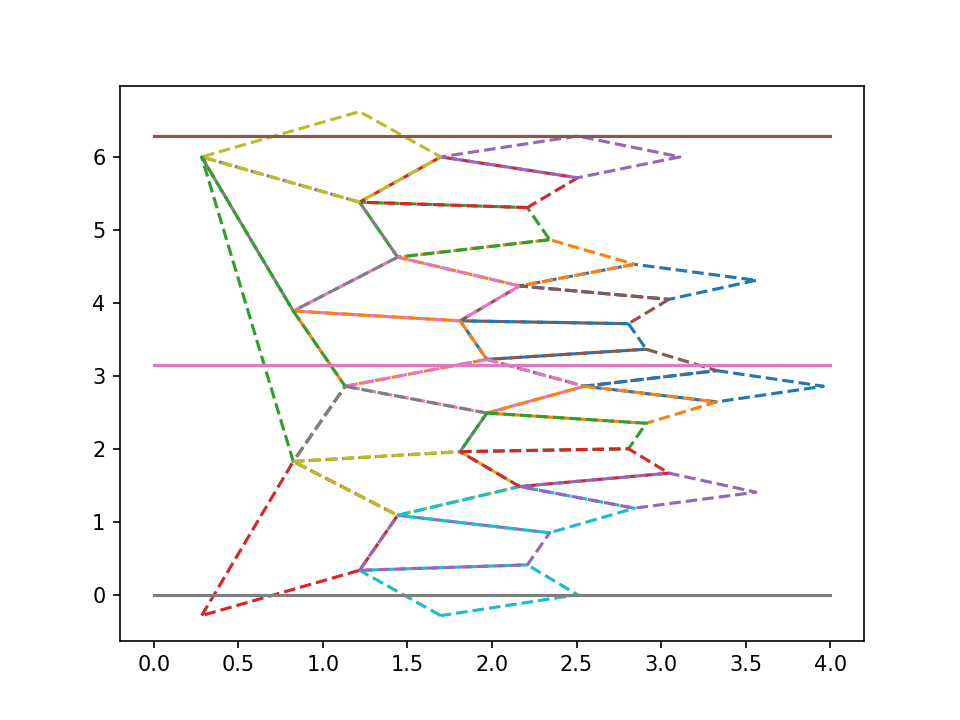

In [8]:
chiDiscAtPi = 0
pi = numpy.pi
two_pi = 2*numpy.pi

ai = AzimuthalIntegrator(1, 2.2e-3, 2.8e-3, rot3=-0.5, detector=det)
if chiDiscAtPi:
    ai.setChiDiscAtPi()
else:
    ai.setChiDiscAtZero()

pos = ai.array_from_unit(typ="corner", unit="r_mm", scale=True)

from matplotlib.pyplot import subplots
fig, ax = subplots()
for i0 in range(pos.shape[0]):
    for i1 in range(pos.shape[1]):
        p = pos[i0, i1].astype("float64")
        splitPixel.recenter(p,chiDiscAtPi)
        p = numpy.concatenate((p, [p[0]]))
        ax.plot(p[:,0], p[:,1], "--")
ax.plot([0,4], [two_pi, two_pi])
ax.plot([0,4], [pi, pi])
ax.plot([0,4], [0, 0])
# ax.plot([0,4], [-pi, -pi])


<IPython.core.display.Javascript object>


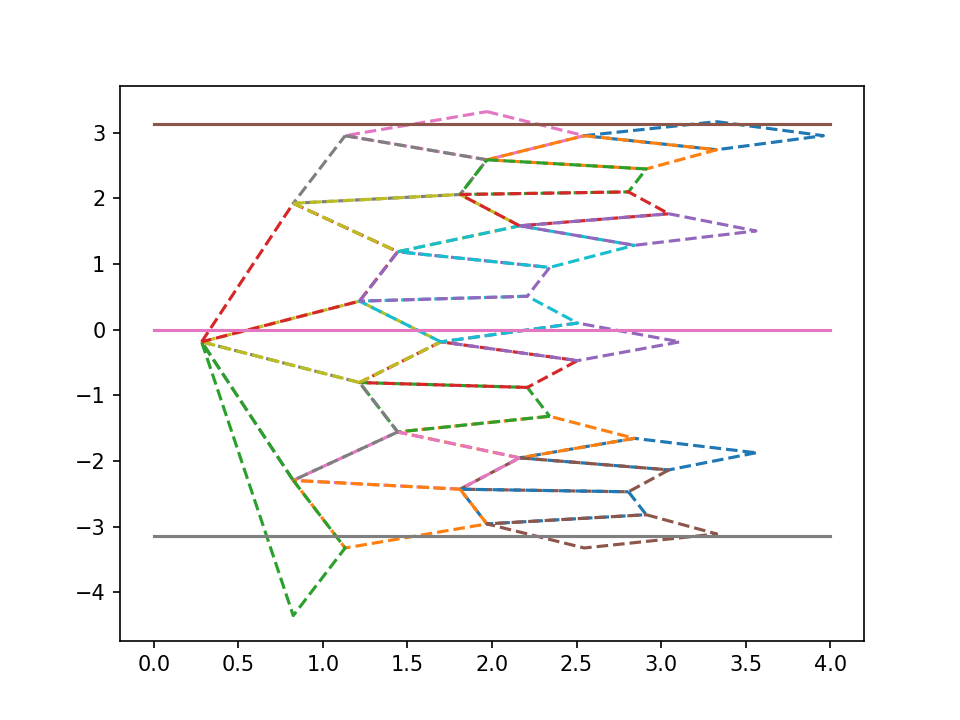

-0.35142626801260235
-0.461272485215801
-0.7756400058910629
-0.9813809926815473
-0.8090756514418818
-0.5085483453237245
-0.7102953275387414
-1.4025754396421801
-1.7543303545809072
-0.9813809888667295
-0.7018073275575887
-1.251509870014991
-1.7486076359602967
-1.4025754569182562
-0.7756400287450269
-0.7171469042487412
-1.038524381899349
-1.2515095647028431
-0.7102954073320547
-0.461272485215801
-0.605455017407101
-0.7171468178598843
-0.7018072277362108
-0.5085484956966155
-0.35142626801260235


In [12]:
chiDiscAtPi = 1
pi = numpy.pi
two_pi = 2*numpy.pi

ai = AzimuthalIntegrator(1, 2.2e-3, 2.8e-3, rot3=-0.6, detector=det)
if chiDiscAtPi:
    ai.setChiDiscAtPi()
else:
    ai.setChiDiscAtZero()

pos = ai.array_from_unit(typ="corner", unit="r_mm", scale=True)

from matplotlib.pyplot import subplots
fig, ax = subplots()
for i0 in range(pos.shape[0]):
    for i1 in range(pos.shape[1]):
        p = pos[i0, i1].astype("float64")
        print(splitPixel.recenter(p,chiDiscAtPi))
        p = numpy.concatenate((p, [p[0]]))
        ax.plot(p[:,0], p[:,1], "--")
ax.plot([0,4], [pi, pi])
ax.plot([0,4], [0, 0])
ax.plot([0,4], [-pi, -pi])


In [13]:
pos

array([[[[ 3.5608988 , -2.0756235 ],
         [ 3.0463092 , -2.336701  ],
         [ 2.1633308 , -2.15359   ],
         [ 2.842534  , -1.8565258 ]],

        [[ 2.842534  , -1.8565258 ],
         [ 2.1633308 , -2.15359   ],
         [ 1.4422206 , -1.758799  ],
         [ 2.34094   , -1.5195674 ]],

        [[ 2.34094   , -1.5195674 ],
         [ 1.4422206 , -1.758799  ],
         [ 1.2165525 , -1.0056477 ],
         [ 2.2090724 , -1.0801364 ]],

        [[ 2.2090724 , -1.0801364 ],
         [ 1.2165525 , -1.0056477 ],
         [ 1.6970562 , -0.38539815],
         [ 2.505993  , -0.6714496 ]],

        [[ 2.505993  , -0.6714496 ],
         [ 1.6970562 , -0.38539815],
         [ 2.505993  , -0.09934672],
         [ 3.1112697 , -0.38539815]]],


       [[[ 3.0463092 , -2.336701  ],
         [ 2.807134  , -2.6702852 ],
         [ 1.811077  , -2.6309354 ],
         [ 2.1633308 , -2.15359   ]],

        [[ 2.1633308 , -2.15359   ],
         [ 1.811077  , -2.6309354 ],
         [ 0.82462114, -